In [1]:
# In order to import event extraction module...
import sys
sys.path.append('/Users/gvieira/code/toneto/shan')

In [2]:
import math
import random
import numpy as np

import matplotlib.pyplot as plt

from eventextraction import smooth_without_delay, interpolate_to_match, extract_peaks

In [3]:
def make_noisy(seq, amp=0.2): # seq is a numpy array
    random.seed(1) # ensure some determinism
    noise_amp = amp * abs(seq.max() - seq.min())
    return np.array([(y + (random.random()*noise_amp/2) - (random.random()*noise_amp/2)) for y in seq])

In [4]:
def plot(seq):
    plt.scatter([i for i in range(len(seq))], seq)

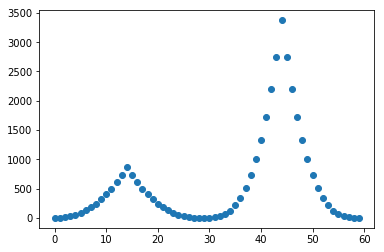

In [5]:
seq = [math.pow(i, 3) for i in range(15)] + [math.pow(15 - i, 3) for i in range(15)] + [math.pow(i, 2.5) for i in range(15)] + [math.pow(15 - i, 2.5) for i in range(15)]
seq.reverse()
plot(seq)

### Signal that came from the "real world"
This next `noisy_seq` is the raw *intersection area over time* signal we got from object tracking.

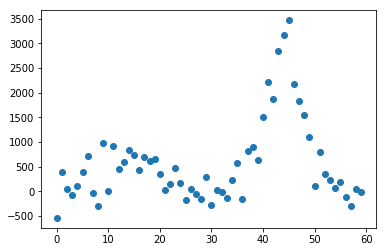

In [6]:
noisy_seq = make_noisy(np.array(seq), amp=0.45)
plot(noisy_seq)

### 1. Smooth the signal
Notice how we mess up the amplitude. The higher peak was around `3000` and now it's around `1300`. This is bad because we would have guessed `3000` by inspecting the video, and that is the value we would have used to calibrate the parameters.

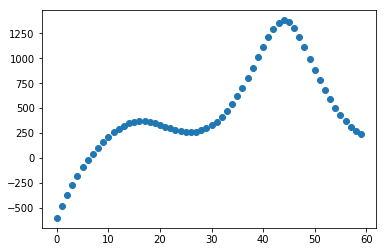

In [7]:
smooth_seq = smooth_without_delay(noisy_seq, butter_ord=1, butter_crit_freq=0.05)
plot(smooth_seq)

### 2. Interpolate to fix amplitude
Next we interpolate this signal to match the amplitude of the original raw signal.

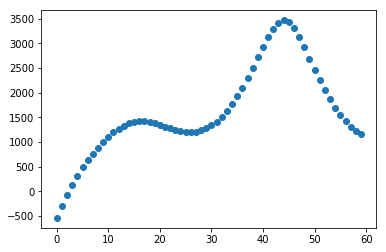

In [8]:
interp_seq = interpolate_to_match(smooth_seq, noisy_seq)
plot(interp_seq)

### 3. Extract peaks
And now we can extract the peaks using our easy-to-calibrate values.

In [9]:
extract_peaks(interp_seq, min_height=3000, min_width=1)

[Peak(index=44, duration=13.592457473167471, height=3466.4748060574675)]

### Extracting "in out" events 
This function simply puts these 3 steps together. Do notice the **current limitation** that we only take 1 event out of the signal.

In [10]:
from eventextraction import extract_in_out_event_for

In [12]:
evt = extract_in_out_event_for(seq, 'foo', min_duration=1, min_area=3000, butter_ord=1, butter_crit_freq=0.05)
evt.index

44

## More cases

This one is used during testing of `extract_events`:

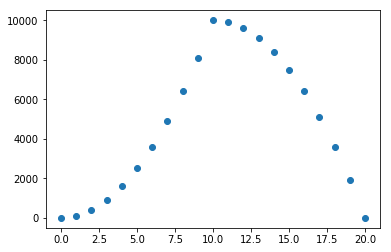

In [28]:
iaot = np.array([0, 100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000, 9900, 9600, 9100, 8400, 7500, 6400, 5100, 3600, 1900, 0])
plot(iaot)

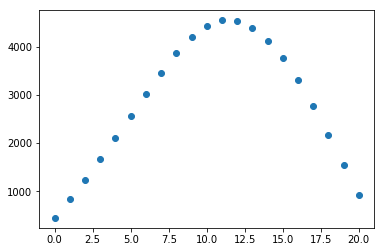

In [29]:
smooth_seq = smooth_without_delay(iaot, butter_ord=1, butter_crit_freq=0.05)
plot(smooth_seq)

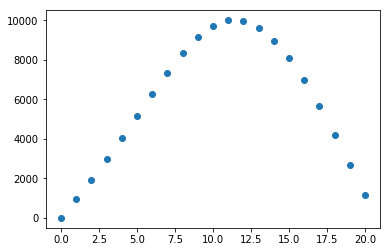

In [30]:
interp_seq = interpolate_to_match(smooth_seq, iaot)
plot(interp_seq)

In [31]:
extract_peaks(interp_seq, min_height=9000, min_width=5)

[Peak(index=11, duration=11.680617047361181, height=10000.0)]